# RADseq data simulations

I simulated two trees to work with. One that is completely imbalanced (ladder-like) and one that is balanced (equal number tips descended from each node). I'm using the Python package `ete2` for most of the tree manipulations. This notebook was run in Python 2.7. You will also need the package rpy2 installed, as well as a working version of R with the package 'ape' to make tree plots later in the notebook. 

In [28]:
## standard Python imports
import glob
import itertools
from collections import OrderedDict, Counter

## extra Python imports
import rpy2              ## required for tree plotting
import ete2              ## used for tree manipulation
import egglib            ## used for coalescent simulations
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
## print versions
for pkg in [matplotlib, np, pd, ete2, rpy2]:
    print "{:<10}\t{:<10}".\
    format(pkg.__name__, pkg.__version__)

matplotlib	1.5.1     
numpy     	1.11.0    
pandas    	0.18.0    
ete2      	2.3.10    
rpy2      	2.8.2     


### Simulation software
I wrote a program to simulate RAD-seq like sequence data which uses the python package egglib for coalescent simulations. Below will check that you have the relevant software installed. See here for simrrls installation: https://github.com/dereneaton/simrrls


In [20]:
## check simrrls package and requirements
import egglib
import simrrls


In [21]:
## print versions
print 'egglib', egglib.version
print 'simrrls', simrrls.__version__

egglib 2.1.11
simrrls 0.0.11


# Generate trees for simulations

### Make a balanced tree with 64 tips and tree length = 6

In [5]:
## base tree
Tbal = ete2.Tree()

## branch lengths
bls = 1.

## namer
n = iter(('s'+str(i) for i in xrange(1,1500)))

## first nodes
n1 = Tbal.add_child(name=n.next(), dist=bls)
n2 = Tbal.add_child(name=n.next(), dist=bls)

## make balanced tree
while len(Tbal.get_leaves()) < 64:
    thisrep = Tbal.get_descendants()
    for node in thisrep:
        if len(node.get_children()) < 1:
            node.add_child(name=n.next(), dist=bls)
            node.add_child(name=n.next(), dist=bls)

## Save newick string to file
Tbal.write(outfile="Tbal.tre", format=3)

String representation

In [6]:
## newick string
! cat Tbal.tre

((((((s63:1,s64:1)s31:1,(s65:1,s66:1)s32:1)s15:1,((s67:1,s68:1)s33:1,(s69:1,s70:1)s34:1)s16:1)s7:1,(((s71:1,s72:1)s35:1,(s73:1,s74:1)s36:1)s17:1,((s75:1,s76:1)s37:1,(s77:1,s78:1)s38:1)s18:1)s8:1)s3:1,((((s79:1,s80:1)s39:1,(s81:1,s82:1)s40:1)s19:1,((s83:1,s84:1)s41:1,(s85:1,s86:1)s42:1)s20:1)s9:1,(((s87:1,s88:1)s43:1,(s89:1,s90:1)s44:1)s21:1,((s91:1,s92:1)s45:1,(s93:1,s94:1)s46:1)s22:1)s10:1)s4:1)s1:1,(((((s95:1,s96:1)s47:1,(s97:1,s98:1)s48:1)s23:1,((s99:1,s100:1)s49:1,(s101:1,s102:1)s50:1)s24:1)s11:1,(((s103:1,s104:1)s51:1,(s105:1,s106:1)s52:1)s25:1,((s107:1,s108:1)s53:1,(s109:1,s110:1)s54:1)s26:1)s12:1)s5:1,((((s111:1,s112:1)s55:1,(s113:1,s114:1)s56:1)s27:1,((s115:1,s116:1)s57:1,(s117:1,s118:1)s58:1)s28:1)s13:1,(((s119:1,s120:1)s59:1,(s121:1,s122:1)s60:1)s29:1,((s123:1,s124:1)s61:1,(s125:1,s126:1)s62:1)s30:1)s14:1)s6:1)s2:1);

In [7]:
## show tree, remove node circles
#for node in Tbal.traverse():
#    node.img_style["size"] = 0
#Tbal.render("%%inline", h=500)

## Make an imbalanced tree of same treelength with 64 tips

In [8]:
## base tree
Timb = ete2.Tree()

## namer
n = iter(('s'+str(i) for i in range(1,5000)))

## scale branches to match balanced treelength
brlen = (bls*6.)/63

## first nodes
n1 = Timb.add_child(name=n.next(), dist=brlen)
n2 = Timb.add_child(name=n.next(), dist=brlen)

while len(Timb.get_leaves()) < 64:  
    ## extend others
    for tip in Timb.get_leaves()[:-1]:
        tip.dist += brlen
    ## extend the last node
    Timb.get_leaves()[-1].add_child(name=n.next(), dist=brlen)
    Timb.get_leaves()[-1].add_sister(name=n.next(), dist=brlen)

## write to file
Timb.write(outfile="Timb.tre", format=3)

Or copy the following string to a file:

In [9]:
! cat Timb.tre

(s1:6,(s3:5.90476,(s5:5.80952,(s7:5.71429,(s9:5.61905,(s11:5.52381,(s13:5.42857,(s15:5.33333,(s17:5.2381,(s19:5.14286,(s21:5.04762,(s23:4.95238,(s25:4.85714,(s27:4.7619,(s29:4.66667,(s31:4.57143,(s33:4.47619,(s35:4.38095,(s37:4.28571,(s39:4.19048,(s41:4.09524,(s43:4,(s45:3.90476,(s47:3.80952,(s49:3.71429,(s51:3.61905,(s53:3.52381,(s55:3.42857,(s57:3.33333,(s59:3.2381,(s61:3.14286,(s63:3.04762,(s65:2.95238,(s67:2.85714,(s69:2.7619,(s71:2.66667,(s73:2.57143,(s75:2.47619,(s77:2.38095,(s79:2.28571,(s81:2.19048,(s83:2.09524,(s85:2,(s87:1.90476,(s89:1.80952,(s91:1.71429,(s93:1.61905,(s95:1.52381,(s97:1.42857,(s99:1.33333,(s101:1.2381,(s103:1.14286,(s105:1.04762,(s107:0.952381,(s109:0.857143,(s111:0.761905,(s113:0.666667,(s115:0.571429,(s117:0.47619,(s119:0.380952,(s121:0.285714,(s123:0.190476,(s125:0.0952381,s126:0.0952381)s124:0.0952381)s122:0.0952381)s120:0.0952381)s118:0.0952381)s116:0.0952381)s114:0.0952381)s112:0.0952381)s110:0.0952381)s108:0.0952381)s106:0.0952381)s104:0.0952381)s102:0

In [10]:
## show tree, remove node circles
#for node in Timb.traverse():
#    node.img_style["size"] = 0
#Timb.render("%%inline", h=500)

Check that the trees are the same length (close enough).

In [11]:
print set([i.get_distance(Tbal) for i in Tbal]), 'treelength'
print len(Tbal), 'tips'

print set([i.get_distance(Timb) for i in Timb]), 'treelength'
print len(Timb), 'tips'

set([6.0]) treelength
64 tips
set([5.999999999999996]) treelength
64 tips


## An ultrametric topology of Viburnum w/ 64 tips
This tree is inferred in notebook 3, and here it is scaled with penalized likelihood to be ultrametric.

In [12]:
%load_ext rpy2.ipython

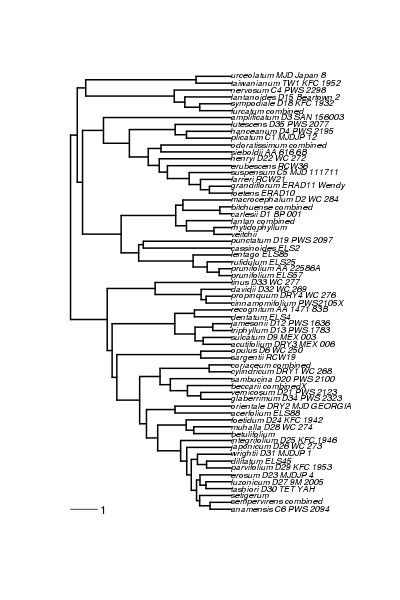

In [13]:
%%R -w 400 -h 600
library(ape)

## make tree ultrametric using penalized likelihood
Vtree <- read.tree("~/Dropbox/RAxML_bestTree.VIB_small_c85d6m4p99")
Utree <- drop.tip(Vtree, "clemensiae_DRY6_PWS_2135")
Utree <- ladderize(chronopl(Utree, 0.5))

## multiply bls so tree length=6 after dropping outgroup
Utree$edge.length <- Utree$edge.length*6

## save the new tree
write.tree(Utree, "Tvib.tre")
plot(Utree, cex=0.7, edge.width=2)
add.scale.bar()
#edgelabels(round(Utree$edge.length,3))

In [14]:
#### load TVib tree into Python and print newick string
Tvib = ete2.Tree("Tvib.tre")
! cat Tvib.tre

(((((((((((((anamensis_C6_PWS_2094:0.7975737351,sempervirens_combined:0.7975737351):0.38788117,setigerum:1.185454905):0.1159036148,((tashiori_D30_TET_YAH:0.9508943617,luzonicum_D27_9M_2005:0.9508943617):0.2224344758,erosum_D23_MJDJP_4:1.173328837):0.1280296823):0.1966874261,((parvifolium_D29_KFC_1953:0.9280851365,dilitatum_ELS45:0.9280851365):0.3392240969,wrightii_D31_MJDJP_1:1.267309233):0.2307367125):0.1683708168,japonicum_D26_WC_273:1.666416763):0.2285748893,integrifolium_D25_KFC_1946:1.894991652):0.8552902281,((betulifolium:1.406180911,muhalla_D28_WC_274:1.406180911):0.2814444291,foetidum_D24_KFC_1942:1.68762534):1.06265654):0.4191560518,(acerfolium_ELS88:2.103542008,orientale_DRY2_MJD_GEORGIA:2.103542008):1.065895924):0.2536372853,((((glaberrimum_D34_PWS_2323:1.145733296,vernicosum_D21_PWS_2123:1.145733296):0.4959207291,beccarii_combinedX:1.641654025):0.6376473347,sambucina_D20_PWS_2100:2.27930136):0.3829119791,(cylindricum_DRY1_WC_268:0.8292472406,coriaceum_combined:0.8292472406)

# Simulate sequence data on each tree
Here I use the _simrrls_ program to simulate RADseq data on each input topology with locus dropout occurring with respect to phylogenetic distances. Find simrrls in my github profile.

## Comparing tree shapes and sources of missing data

In [15]:
%%bash
## balanced tree 
mkdir -p Tbal_rad_drop/
mkdir -p Tbal_ddrad_drop/
mkdir -p Tbal_rad_covfull/
mkdir -p Tbal_rad_covlow/
mkdir -p Tbal_rad_covmed/

## imbalanced tree
mkdir -p Timb_rad_drop/
mkdir -p Timb_ddrad_drop/
mkdir -p Timb_rad_covfull/
mkdir -p Timb_rad_covlow/
mkdir -p Timb_rad_covmed/

## sims on empirical Viburnum topo
mkdir -p Tvib_rad_drop/
mkdir -p Tvib_ddrad_drop/
mkdir -p Tvib_rad_covfull/
mkdir -p Tvib_rad_covlow/
mkdir -p Tvib_rad_covmed

#### Show simrrls options

In [16]:
%%bash
simrrls -h

usage: simrrls [-h] [--version] [-o outname] [-mc dropout] [-ms dropout]
               [-e error] [-f datatype] [-I indels] [-l length] [-L nLoci]
               [-n Ninds] [-N Ne] [-t tree] [-u mu] [-df depthfunc]
               [-dm depthmean] [-ds depthstd] [-c1 cut_1] [-c2 cut_2]
               [-i1 min_insert] [-i2 max_insert] [-r1 seed_1] [-r2 seed_2]

optional arguments:
  -h, --help      show this help message and exit
  --version       show program's version number and exit
  -o outname      [str] output file name prefix (default 'out')
  -mc dropout     [0/1] allelic dropout from mutation to cut sites (default 0)
  -ms dropout     [0/1] allelic dropout from new cut sites in seq (default 0)
  -e error        [float] sequencing error rate (default 0.0005)
  -f datatype     [str] datatype (default rad) (options: rad, gbs, ddrad,
                  pairddrad, pairgbs)
  -I indels       [float] rate of indel mutations (default 0) ex: 0.001
  -l length       [int] length of simulat

## Simulate RAD data on different trees and with sampling
Here I simulate 1000 loci on each tree. For each tree data are simulated in 5 ways. With and without data loss from mutation-disruption or low sequencing coverage, and as a rad data type (one cutter) and ddrad (two cutters). This will take about 10 minutes to run probably.

In [18]:
%%bash
for tree in Tbal Timb Tvib;
  do 
    simrrls -mc 1 -ms 1 -t $tree.tre \
            -L 1000 -l 100 \
            -u 1e-9 -N 1e6 \
            -f rad -c1 CTGCAG \
            -o $tree\_rad_drop/$tree
            
    simrrls -mc 1 -ms 1 -t $tree.tre \
            -L 1000 -l 100 \
            -u 1e-9 -N 1e6 \
            -f ddrad -c1 CTGCAG -c2 AATT \
            -o $tree\_ddrad_drop/$tree        
    
    simrrls -mc 0 -ms 0 -t $tree.tre \
            -L 1000 -l 100 \
            -u 1e-9 -N 1e6 \
            -f rad -c1 CTGCAG \
            -o $tree\_rad_covfull/$tree

    simrrls -mc 0 -ms 0 -t $tree.tre \
            -L 1000 -l 100 \
            -u 1e-9 -N 1e6 \
            -f rad -c1 CTGCAG \
            -dm 5 -ds 5 \
            -o $tree\_rad_covmed/$tree
            
    simrrls -mc 0 -ms 0 -t $tree.tre \
            -L 1000 -l 100 \
            -u 1e-9 -N 1e6 \
            -f rad -c1 CTGCAG \
            -dm 2 -ds 5 \
            -o $tree\_rad_covlow/$tree
done

# Assemble data sets in _pyRAD_

In [22]:
%%bash
pyrad --version

pyRAD 3.0.66


In [25]:
%%bash
## new params file (remove existing file if present)
rm params.txt
pyrad -n

	new params.txt file created


In [26]:
%%bash
## enter parameters into params file using sed
sed -i '/## 1. /c\Tbal_rad_drop       ## 1. working dir ' params.txt
sed -i '/## 2. /c\Tbal_rad_drop/*.gz  ## 2. data loc ' params.txt
sed -i '/## 3. /c\Tbal_rad_drop/*barcodes.txt  ## 3. Bcode ' params.txt
sed -i '/## 6. /c\TGCAG,AATT          ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                  ## 7. Nproc ' params.txt
sed -i '/## 10. /c\.82                ## 10. clust thresh' params.txt
sed -i '/## 11. /c\rad                ## 11. datatype ' params.txt
sed -i '/## 12. /c\2                  ## 12. minCov ' params.txt
sed -i '/## 13. /c\10                  ## 13. maxSH' params.txt
sed -i '/## 14. /c\Tbal               ## 14. outname' params.txt
sed -i '/## 24./c\99                  ## 24. maxH' params.txt
sed -i '/## 30./c\n,p,s               ## 30. out format' params.txt

In [ ]:
## IPython code to iterate over trees and coverages and run pyrad
## sometimes this freezes when run in a jupyter notebook due 
## to problems with multiprocessing in notebooks. This is why my new
## work with ipyrad uses ipyparallel instead of multiprocessing. 

for tree in ['Tbal', 'Timb', 'Tvib']:
    for dtype in ['rad', 'ddrad']:
        with open('params.txt', 'rb') as params:
            pp = params.readlines()
            pp[1] = "{}_{}_drop                 ## 1. \n".format(tree, dtype)
            pp[2] = "{}_{}_drop/*.gz            ## 2. \n".format(tree, dtype)
            pp[3] = "{}_{}_drop/*barcodes.txt   ## 3. \n".format(tree, dtype)
            pp[14] = "{}                        ## 14. \n".format(tree)
        with open('params.txt', 'wb') as params:
            params.write("".join(pp))
        ## this calls pyrad as a bash script
        ! pyrad -p params.txt >> log.txt 2>&1  
          
    for cov in ['full', 'med', 'low']:
        with open('params.txt', 'rb') as params:
            pp = params.readlines()
            pp[1] = "{}_rad_cov{}                ## 1. \n".format(tree, cov)
            pp[2] = "{}_rad_cov{}/*.gz           ## 2. \n".format(tree, cov)
            pp[3] = "{}_rad_cov{}/*barcodes.txt  ## 3. \n".format(tree, cov)
            pp[14] = "{}                         ## 14. \n".format(tree)     
        with open('params.txt', 'wb') as params:
            params.write("".join(pp))    
        ## this calls pyrad as a bash script            
        ! pyrad -p params.txt >> log.txt 2>&1  

# Visualize data sharing on these trees

In [30]:
def getarray(locifile, tree):
    """ parse the loci list and return a 
        presence/absence matrix ordered by 
        the tips on the tree"""
    ## parse the loci file
    loci = open(locifile).read().split("\n//")[:-1]
    ## order (ladderize) the tree
    tree.ladderize()
    ## get tip names
    names = tree.get_leaf_names()
    ## make empty matrix
    lxs = np.zeros((len(names), len(loci)))
    ## fill the matrix
    for loc in xrange(len(loci)):
        for seq in loci[loc].split("\n"):
            if ">" in seq:
                lxs[names.index(seq.split()[0][1:].rsplit("_", 1)[0]),loc] += 1
    return lxs

In [31]:
def countmatrix(lxsabove, lxsbelow, max=0):
    """ fill a matrix with pairwise data sharing
        between each pair of samples. You could put
        in two different 'share' matrices to have
        different results above and below the diagonal.
        Can enter a max value to limit fill along diagonal.
        """
    share = np.zeros((lxsabove.shape[0], 
                      lxsbelow.shape[0]))
    ## fill above
    names = range(lxsabove.shape[0])
    for row in lxsabove:
        for samp1,samp2 in itertools.combinations(names,2):
            shared = lxsabove[samp1, lxsabove[samp2,]>0].sum()
            share[samp1,samp2] = shared
    ## fill below
    for row in lxsbelow:
        for samp2,samp1 in itertools.combinations(names,2):
            shared = lxsabove[samp1, lxsabove[samp2,]>0].sum()
            share[samp1,samp2] = shared
    ## fill diagonal
    if not max:
        for row in range(len(names)):
            share[row,row] = lxsabove[row,].sum()
    else:
        for row in range(len(names)):
            share[row,row] = max
    return share

In [32]:
def plotSVGmatrix(share, outname):
    surf = plt.pcolormesh(share, cmap="gist_yarg")
    dims = plt.axis('image')
    surf.axes.get_xaxis().set_ticklabels([])
    surf.axes.get_xaxis().set_ticks([])
    surf.axes.get_yaxis().set_ticklabels([])
    surf.axes.get_yaxis().set_ticks([])
    ax = plt.gca()
    ax.invert_yaxis()
    plt.colorbar(surf, aspect=15)
    if outname:
        plt.savefig(outname+".svg")
    
    
def fullplot(locifile, tree, outname=None):
    lxsB = getarray(locifile, tree)
    share = countmatrix(lxsB, lxsB)
    plotSVGmatrix(share, outname)

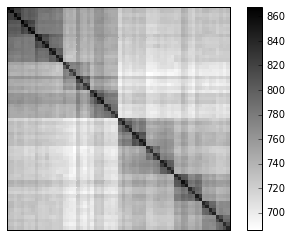

In [41]:
fullplot('Tbal_rad_drop/outfiles/Tbal.loci', Tbal, 'Tbal_drop')

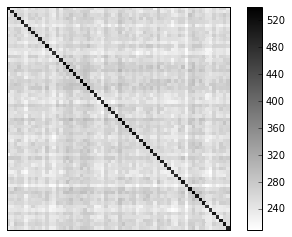

In [42]:
fullplot('Tbal_rad_covlow/outfiles/Tbal.loci', Tbal, 'Tbal_covlow')

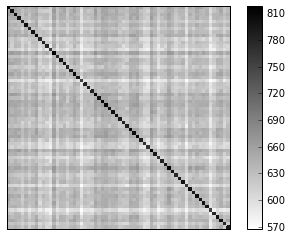

In [43]:
fullplot('Tbal_rad_covmed/outfiles/Tbal.loci', Tbal, 'Tbal_covmed')

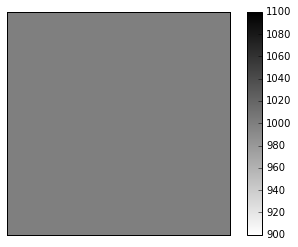

In [44]:
fullplot('Tbal_rad_covfull/outfiles/Tbal.loci', Tbal, 'Tbal_covfull')

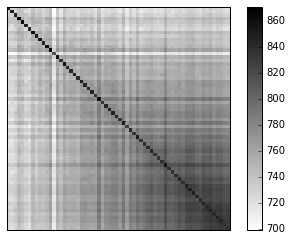

In [45]:
fullplot('Timb_rad_drop/outfiles/Timb.loci', Timb, 'Timb_drop')

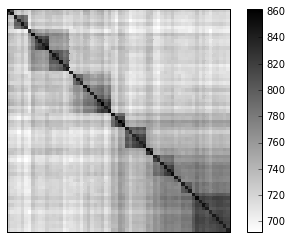

In [46]:
fullplot('Tvib_rad_drop/outfiles/Tvib.loci', Tvib, 'Tvib_drop')

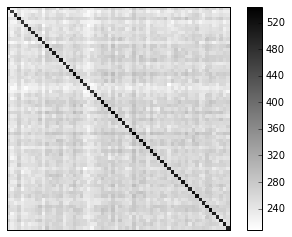

In [47]:
fullplot('Tvib_rad_covlow/outfiles/Tvib.loci', Tvib, 'Tvib_covlow')

# The hierarchical distribution of informative sites
First we re-calculate the pair-wise data sharing matrices for all species in each data set. 

In [49]:
lxs_Tbal_droprad = getarray("Tbal_rad_drop/outfiles/Tbal.loci", Tbal)
lxs_Tbal_dropddrad = getarray("Tbal_ddrad_drop/outfiles/Tbal.loci", Tbal)
lxs_Tbal_covlow = getarray("Tbal_rad_covlow/outfiles/Tbal.loci", Tbal)
lxs_Tbal_covmed = getarray("Tbal_rad_covmed/outfiles/Tbal.loci", Tbal)
lxs_Tbal_covfull = getarray("Tbal_rad_covfull/outfiles/Tbal.loci", Tbal)

lxs_Timb_droprad = getarray("Timb_rad_drop/outfiles/Timb.loci", Timb)
lxs_Timb_dropddrad = getarray("Timb_ddrad_drop/outfiles/Timb.loci", Timb)
lxs_Timb_covlow = getarray("Timb_rad_covlow/outfiles/Timb.loci", Timb)
lxs_Timb_covmed = getarray("Timb_rad_covmed/outfiles/Timb.loci", Timb)
lxs_Timb_covfull = getarray("Timb_rad_covfull/outfiles/Timb.loci", Timb)

lxs_Tvib_droprad = getarray("Tvib_rad_drop/outfiles/Tvib.loci", Tvib)
lxs_Tvib_dropddrad = getarray("Tvib_ddrad_drop/outfiles/Tvib.loci", Tvib)
lxs_Tvib_covlow = getarray("Tvib_rad_covlow/outfiles/Tvib.loci", Tvib)
lxs_Tvib_covmed = getarray("Tvib_rad_covmed/outfiles/Tvib.loci", Tvib)
lxs_Tvib_covfull = getarray("Tvib_rad_covfull/outfiles/Tvib.loci", Tvib)

#### A function to count loci for each bipartition (quartet-style)

In [50]:
def count_inf4(tree, matrix, node):
    """ count the number of loci with data spanning 
    a given node in the tree """
    
    ## get children of selected node
    a, b = node.get_children()
    
    ## get tip descendents of a and b
    tips_a = set(a.get_leaf_names())
    tips_b = set(b.get_leaf_names())
    
    ## get every other tip (outgroups)
    upone = node.up
    if upone.is_root():
        ch = upone.children
        sis = [i for i in ch if i != node][0]
        if sis.children:
            tips_c = sis.children[0].get_leaf_names()
            tips_d = sis.children[1].get_leaf_names()
        else:
            return 0
    else:
        upone = set(node.up.get_leaf_names())
        tips_c = upone - tips_a - tips_b
        tips_all = set(tree.get_leaf_names())
        tips_d = tips_all - tips_a - tips_b - tips_c
    
    ## get indices in matrix for leaf tips
    names = tree.get_leaf_names()
    index_a = [names.index(i) for i in tips_a]
    index_b = [names.index(i) for i in tips_b]
    index_c = [names.index(i) for i in tips_c]
    index_d = [names.index(i) for i in tips_d]
   
    ## how man loci are "informative"
    inf = 0
    for col in matrix.T:
        hits_a = sum([col[i] for i in index_a])
        hits_b = sum([col[i] for i in index_b])
        hits_c = sum([col[i] for i in index_c])
        hits_d = sum([col[i] for i in index_d])

        if all([hits_a, hits_b, hits_c, hits_d]):
                inf += 1 
    return inf    

#### A function to write data to file for plotting
Here I iterate over each node and apply _count\_inf4_ which returns the number of loci that are informative for the subtending bipartition, and _count\_snps_ which counts snps segregating at that bipartition. This takes a few minutes to run.

In [51]:
def nodes_dat(tree, lxs, datfilename):
    dat = []
    for node in tree.traverse():
        if not (node.is_leaf() or node.is_root()):
            loci = count_inf4(tree, lxs, node)
            dist = round(tree.get_distance(node),2)
            dat.append([dist, loci])
            node.name = "%d" % loci
    
    ## print tree with bls & node labels
    tree.write(format=3,outfile=datfilename+".tre")
    
    ## print data to file
    with open(datfilename, 'w') as outfile:
        np.savetxt(outfile, np.array(dat), fmt="%.2f")

## Make data files

In [52]:
%%bash
## a new directory to store the data in
mkdir -p analysis_counts2

In [53]:
nodes_dat(Tbal, lxs_Tbal_droprad, 
          "analysis_counts2/Tbal_droprad.dat3")
nodes_dat(Tbal, lxs_Tbal_dropddrad, 
          "analysis_counts2/Tbal_dropddrad.dat3")
nodes_dat(Tbal, lxs_Tbal_covlow, 
          "analysis_counts2/Tbal_covlow.dat3")    
nodes_dat(Tbal, lxs_Tbal_covmed, 
          "analysis_counts2/Tbal_covmed.dat3")
nodes_dat(Tbal, lxs_Tbal_covfull,
          "analysis_counts2/Tbal_covfull.dat3")

In [54]:
nodes_dat(Timb, lxs_Timb_droprad, 
          "analysis_counts2/Timb_droprad.dat3")
nodes_dat(Timb, lxs_Timb_dropddrad, 
          "analysis_counts2/Timb_dropddrad.dat3")
nodes_dat(Timb, lxs_Timb_covlow, 
          "analysis_counts2/Timb_covlow.dat3")    
nodes_dat(Timb, lxs_Timb_covmed, 
          "analysis_counts2/Timb_covmed.dat3")
nodes_dat(Timb, lxs_Timb_covfull,
          "analysis_counts2/Timb_covfull.dat3")

In [55]:
nodes_dat(Tvib, lxs_Tvib_droprad, 
          "analysis_counts2/Tvib_droprad.dat3")  
nodes_dat(Tvib, lxs_Tvib_dropddrad, 
          "analysis_counts2/Tvib_dropddrad.dat3")    
nodes_dat(Tvib, lxs_Tvib_covlow, 
          "analysis_counts2/Tvib_covlow.dat3")    
nodes_dat(Tvib, lxs_Tvib_covmed, 
          "analysis_counts2/Tvib_covmed.dat3")
nodes_dat(Tvib, lxs_Tvib_covfull,
          "analysis_counts2/Tvib_covfull.dat3")

# Plot the hierarchical distribution with the trees

In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
library(ape)

### Load in the data to R

In [56]:
%%R
## read in the data and factor results
dat <- read.table("analysis_counts2/Tbal_droprad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tbal_droprad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tbal_dropddrad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tbal_dropddrad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tbal_covlow.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tbal_covlow_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tbal_covmed.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tbal_covmed_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tbal_covfull.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tbal_covfull_Lme <- with(dat, tapply(loci, depth, mean))

In [57]:
%%R
## read in the data and factor results
dat <- read.table("analysis_counts2/Timb_droprad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Timb_droprad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Timb_dropddrad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Timb_dropddrad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Timb_covlow.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Timb_covlow_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Timb_covmed.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Timb_covmed_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Timb_covfull.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Timb_covfull_Lme <- with(dat, tapply(loci, depth, mean))

In [58]:
%%R
## read in the data and factor results
dat <- read.table("analysis_counts2/Tvib_droprad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tvib_droprad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tvib_dropddrad.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tvib_dropddrad_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tvib_covlow.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tvib_covlow_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tvib_covmed.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tvib_covmed_Lme <- with(dat, tapply(loci, depth, mean))

dat <- read.table("analysis_counts2/Tvib_covfull.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
Tvib_covfull_Lme <- with(dat, tapply(loci, depth, mean))

### Plots

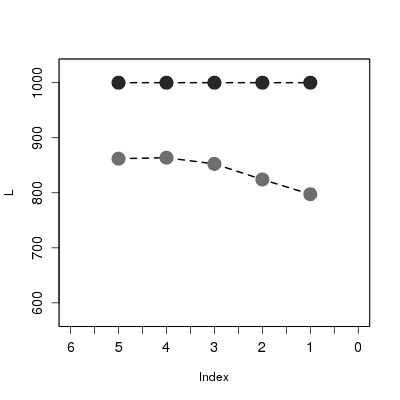

In [59]:
%%R -w 400 -h 400

#svg("box1.svg", width=4, height=5)

L = Tbal_droprad_Lme
plot(L, xlim=c(0,6), ylim=c(575,1025), 
     cex.axis=1.25, type='n', xaxt="n")
#abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tbal_covfull_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tbal_droprad_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#6E6E6E", bg="#6E6E6E", lwd=0.75)

#L = Tbal_dropddrad_Lme 
#df1 = data.frame(as.numeric(names(L)),as.numeric(L))
#points(df1, cex=3.5, pch=21, col="#6E6E6E", bg="#D3D3D3", lwd=0.75)

box()

axis(side=1, at=seq(0,6,0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)

#dev.off()

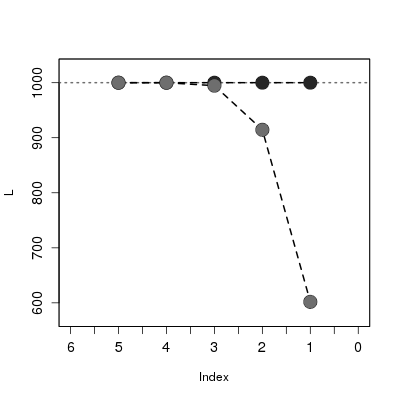

In [60]:
%%R -w 400 -h 400

#svg("box2.svg", width=4, height=5)

L = Tbal_covlow_Lme
plot(L, xlim=c(0,6), ylim=c(575,1025), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tbal_covfull_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tbal_covmed_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)


#L = Tbal_covlow_Lme
#df1 = data.frame(as.numeric(names(L)),as.numeric(L))
#points(df1, cex=3.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()

axis(side=1, at=seq(0,6,0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)

#dev.off()

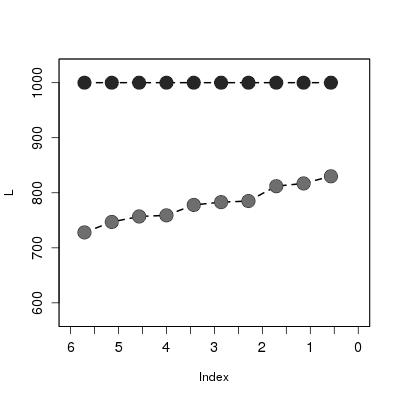

In [61]:
%%R -w 400 -h 400

#svg("box3.svg", width=4, height=5)

## samples every 6th to make plot more readable

L = Timb_droprad_Lme[c(3:62)]
plot(L, xlim=c(0,6), ylim=c(575, 1025), 
     cex.axis=1.25, type='n', xaxt="n")#, yaxt="n")
#abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Timb_covfull_Lme[seq(3, 65, 6)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Timb_droprad_Lme[seq(3, 65, 6)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

box()

axis(side=1, at=seq(0,6, 0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)

#dev.off()

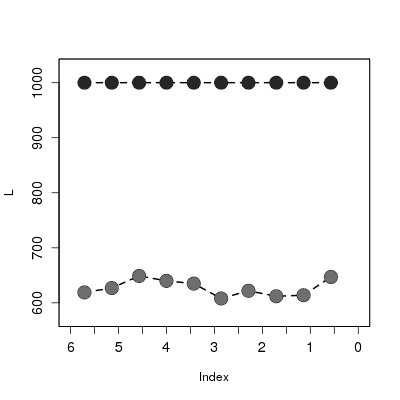

In [62]:
%%R -w 400 -h 400

## samples every 6th to make plot more readable

#svg("box4.svg", width=4, height=5)
L = Timb_droprad_Lme[c(3:62)]
plot(L, xlim=c(0,6), ylim=c(575, 1025), 
     cex.axis=1.25, type='n', xaxt="n")#, yaxt="n")
#abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Timb_covfull_Lme[seq(3, 65, 6)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Timb_covmed_Lme[seq(3, 65, 6)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
lines(df1, type='l', lwd=2, lty=2)
points(df1, cex=2.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

box()

axis(side=1, at=seq(0,6, 0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)
#dev.off()

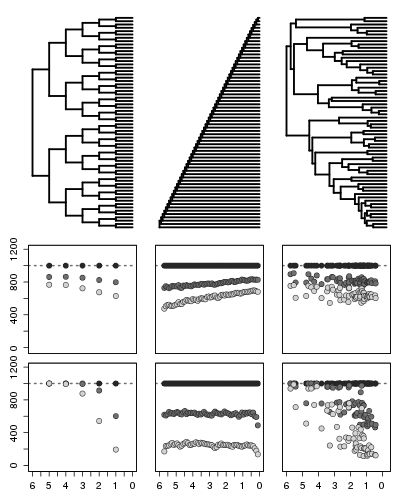

In [63]:
%%R -w 400 -h 500

#svg("Sourcemissing.svg", height=10, width=8)
#svg("Sourcemissing.svg", height=7, width=5.33)

mat2 = matrix(c(1,1,1,4,4,4,7,7,7,  
                1,1,1,4,4,4,7,7,7,
                2,2,2,5,5,5,8,8,8,
                3,3,3,6,6,6,9,9,9),
                4,9, byrow=TRUE)
layout(mat2)
par(mar=c(1,1,0,1), 
    oma=c(2,2,1,0))

#########################################################
tre <- read.tree("Tbal.tre")
plot(tre, show.tip.label=F,
     edge.width=2.5, type='p', 
     x.lim=c(0,6))

####  
L = Tbal_droprad_Lme
plot(L, xlim=c(0,6), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tbal_covfull_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tbal_droprad_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Tbal_dropddrad_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()

####
L = Tbal_covlow_Lme
plot(L, xlim=c(0,6), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tbal_covfull_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tbal_covmed_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Tbal_covlow_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

axis(side=1, at=seq(0,6,0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)

box()

##########################################################
tre <- read.tree("Timb.tre")
plot(tre, show.tip.label=F,
     edge.width=2.5, type='p', 
     x.lim=c(0,6))

####
L = Timb_droprad_Lme[c(3:62)]
plot(L, xlim=c(0,6), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n", yaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Timb_covfull_Lme[c(3:62)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Timb_droprad_Lme[c(3:62)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Timb_dropddrad_Lme[c(3:62)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()

####
L = Timb_covlow_Lme[c(3:62)] 
plot(L, xlim=c(0,6), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n", yaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Timb_covfull_Lme[c(3:62)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Timb_covmed_Lme[c(3:62)]
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Timb_covlow_Lme[c(3:62)] 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()

##
axis(side=1, at=seq(0,6,0.5), 
     labels=as.character(seq(6,0,by=-0.5)), cex.axis=1.25)

#########################################################
tre <- read.tree("Tvib.tre")
plot(tre, show.tip.label=F,
     edge.width=2.5, type='p', 
     x.lim=c(0,6))

####
L = Tvib_droprad_Lme
plot(L, xlim=c(0,6.25), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n", yaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tvib_covfull_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tvib_droprad_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Tvib_dropddrad_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()
####

plot(L, xlim=c(0,6.25), ylim=c(-25,1200), 
     cex.axis=1.25, type='n', xaxt="n", yaxt="n")
abline(h=1000, lwd=2, col="#6E6E6E", lty="dotted")

L = Tvib_covfull_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#262626", lwd=0.75)

L = Tvib_covmed_Lme 
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#6E6E6E", lwd=0.75)

L = Tvib_covlow_Lme
df1 = data.frame(as.numeric(names(L)),as.numeric(L))
points(df1, cex=1.5, pch=21, col="#262626", bg="#D3D3D3", lwd=0.75)

box()
##
axis(side=1, at=seq(0,6,1), 
     labels=as.character(seq(6,0,by=-1)), cex.axis=1.25)

#dev.off()

## Empirical data (full & half depth)
Here I am grabbing the assembled empirical data from notebook_1 (Viburnum) to compare the effect of sequencing coverage with the results we see when simulating data on that tree. 

In [64]:
Tvib2 = Tvib.copy()
for node in Tvib2:
    node.name = node.name+"_0"

In [70]:
## full size data
lxs_EmpVib_full = getarray("/home/deren/Dropbox/RADexplore/EmpVib/vib_full_64tip_c85d6m4p99.loci", Tvib)#, dropind=1)
lxs_EmpVib_half = getarray("/home/deren/Dropbox/RADexplore/EmpVib/vib_half_64tip_c85d6m4p99.loci", Tvib)#, dropind=1)

ValueError: 'acutifolium_DRY3_MEX' is not in list

In [ ]:
share_full = countmatrix(lxs_EmpVib_full,lxs_EmpVib_full)
plotSVGmatrix(share_full, "EmpVib_full")

In [ ]:
share_half = countmatrix(lxs_EmpVib_half,lxs_EmpVib_half)
plotSVGmatrix(share_half, "EmpVib_half")

In [ ]:
nodes_dat(Tvib, lxs_EmpVib_half, 
          "analysis_counts/Tvib_Emp_half.dat3")
nodes_dat(Tvib, lxs_EmpVib_full, 
          "analysis_counts/Tvib_Emp_full.dat3")

In [ ]:
%%R
## read in the data and factor results
dat <- read.table("analysis_counts/Tvib_Emp_full.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
EmpVib_full_Lme <- with(dat, tapply(loci, depth, mean))

## read in the data and factor results
dat <- read.table("analysis_counts/Tvib_Emp_half.dat3", 
                  header=F, col.names=c('depth','loci'))
dat[,1] <- as.factor(dat[,1])
EmpVib_half_Lme <- with(dat, tapply(loci, depth, mean))

In [ ]:
%%R
EmpVib_half_Lme

In [ ]:
%%R -w 200 -h 400

#svg("EmpVib_fullvhalf3.svg", height=6, width=2.5)

mat2 <- matrix(c(1,1,1,2),byrow=TRUE)
layout(mat2)
par(mar=c(1,1,0,1), 
    oma=c(2,2,1,0))

#########################################################
#tre <- read.tree("Tvib.tre")
#plot(tre, show.tip.label=F,
#     edge.width=2.5, type='p', 
#     x.lim=c(0,2.25))
Vtre <- read.tree("analysis_counts/EmpVib_full.dat3.tre")
plot(Vtre, cex=0.6, adj=0.05, x.lim=c(0,2.25),
     edge.width=2.5, type='p',show.tip.label=FALSE)
nodelabels(pch=20, col="black",
           cex=as.integer(Vtre$node.label)/7500)

####
L = EmpVib_half_Lme
plot(L, xlim=c(0,2.25), ylim=c(-25,50200), 
     cex.axis=1.25, type='n', xaxt="n")
df1 = data.frame(as.numeric(names(L)),
                 as.numeric(L))
points(df1, cex=1.25, pch=21, col="red", bg="red")

####
L = EmpVib_full_Lme
#plot(L, xlim=c(0,2.25), ylim=c(-25,50200), 
#     cex.axis=1.25, type='n', xaxt="n")
abline(h=0, lwd=2, col="gray", lty="dotted")
df1 = data.frame(as.numeric(names(L)),
                 as.numeric(L))
points(df1, cex=1.25, pch=21, col="#262626", bg="#262626")

#dev.off()

In [ ]:
%%R -w 200 -h 400

#svg("fullvhalf3.svg", height=4.5, width=4)

####
L = EmpVib_full_Lme
plot(L, xlim=c(0,2.25), ylim=c(-25,50200), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=0, lwd=2, col="gray", lty="dotted")
df1 = data.frame(as.numeric(names(L)),
                 as.numeric(L))
points(df1, cex=1.25, pch=21, col="#262626", bg="#262626")


dev.off()

svg("fullonly.svg", height=4.5, width=4)
####
L = EmpVib_half_Lme
plot(L, xlim=c(0,2.25), ylim=c(-25,50200), 
     cex.axis=1.25, type='n', xaxt="n")
df1 = data.frame(as.numeric(names(L)),
                 as.numeric(L))
points(df1, cex=1.25, pch=21, col="red", bg="red")

####
L = EmpVib_full_Lme
abline(h=0, lwd=2, col="gray", lty="dotted")
df1 = data.frame(as.numeric(names(L)),
                 as.numeric(L))
points(df1, cex=1.25, pch=21, col="#262626", bg="#262626")

#dev.off()

In [ ]:
%%R
data.frame(cbind(median(EmpVib_full_Lme),
           median(EmpVib_half_Lme)),
           cbind(mean(EmpVib_full_Lme),
           mean(EmpVib_half_Lme)),
     col.names=c("full","half"))

In [ ]:
%%R
svg('hist.svg', width=4.25, height=4)
hist(rnorm(10000), col="grey")
dev.off()

In [ ]:
%%R -w 300 -h 600

Vtre <- read.tree("analysis_counts/EmpVib_full.dat3.tre")
svg("EmpVib_full_nodes.svg", height=6, width=3)
plot(Vtre, cex=0.6, adj=0.05,
     edge.width=3, show.tip.label=FALSE)
nodelabels(pch=20, col="black",
           cex=as.integer(Vtre$node.label)/10000)
dev.off()

### plOT

In [ ]:
%%R -w 300 -h 600

#svg("locisnpsdepth.svg", height=8, width=4)
#pdf("locisnpsdepth.pdf", height=8, width=4)

mat2 <- matrix(c(1,1,1,5,5,5,
                 1,1,1,5,5,5,
                 2,2,2,6,6,6,
                 3,3,3,7,7,7,
                 4,4,4,8,8,8), 
                 5,6, byrow=TRUE)
layout(mat2)
par(mar=c(1,1,0,1), 
    oma=c(2,2,1,0))
tre <- read.tree("Tbal.tre")
plot(tre, show.tip.label=F,
     edge.width=2.5, type='p', 
     x.lim=c(-0.25,2.75))

##-------------------------------
## Plot full data locus sharing
x = seq(1.5,5.5)
y = Tbal_full_Lme#[1:6]
s = Tbal_full_Lsd#[1:6]
plot(x, y, xlim=c(1,7.2), ylim=c(-25,3100), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1.25, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

x = seq(1.5,5.5)
y = Tbal_full_Sme#[2:6]
s = Tbal_full_Ssd#[2:6]
lines(x, y, lwd=2, col="darkgrey")
points(x, y, cex=1.25, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s, col="darkgrey")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

##--------------------------------
## Plot drop data locus sharing
x = seq(1.5,5.5)
y = Tbal_drop_Lme
s = Tbal_drop_Lsd
plot(x, y, xlim=c(1,7.2), ylim=c(-25,3100), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1.25, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

x = seq(1.5,5.5)
y = Tbal_drop_Sme
s = Tbal_drop_Ssd
lines(x, y, lwd=2, col="darkgrey")
points(x, y, cex=1.25, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s, col="darkgrey")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

##------------------------------
## Plot cov data locus sharing
x = seq(1.5,5.5)
y = Tbal_cov_Lme
s = Tbal_cov_Lsd
plot(x, y, xlim=c(1,7.2), ylim=c(-25,3100), 
     cex.axis=1.25, type='n', xaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1.25, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

x = seq(1.5,5.5)
y = Tbal_cov_Sme
s = Tbal_cov_Ssd
lines(x, y, lwd=2, col="darkgrey")
points(x, y, cex=1.25, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s, col="darkgrey")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)
axis(side=1, at=seq(1.1,8.1,1), 
     labels=as.character(seq(3,-0.5,by=-0.5)), cex.axis=1.25)

###########################################
###########################################
tre <- read.tree("Timb.tre")
plot(tre, show.tip.label=F, 
     edge.width=2, type='p')
##------------------------------------
## Plot full data locus sharing
x = seq(2,62)
y = Timb_full_Lme[2:62]
s = Timb_full_Lsd[2:62]
plot(x, y, xlim=c(1,65), ylim=c(-25,3100), 
     cex.axis=1.25, type='n', yaxt="n", xaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

y = Timb_full_Sme[2:62]
s = Timb_full_Ssd[2:62]
lines(x, y, lwd=2, col="darkgrey")
#points(x, y, cex=1, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s, col="darkgrey")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

##----------------------------------
## Plot full data locus sharing
x = seq(2,62)
y = Timb_drop_Lme[2:62]
s = Timb_drop_Lsd[2:62]
plot(x, y, xlim=c(1,65), ylim=c(-25,3100), 
     cex.axis=1.25, type='n', yaxt="n", xaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

y = Timb_drop_Sme[2:62]
s = Timb_drop_Ssd[2:62]
lines(x, y, lwd=2, col="darkgrey")
#points(x, y, cex=1, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s)
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

##-----------------------------------
## Plot drop data locus sharing
x = seq(2,62)
y = Timb_cov_Lme[2:62]
s = Timb_cov_Lsd[2:62]
plot(x, y,
     xlim=c(1,65), ylim=c(-20,3100), 
     cex=1, cex.axis=1.25,
     pch=21, bg="#262626", xaxt="n", yaxt="n")
abline(h=(seq(0,1000,200)), lwd=1.5, col="gray", lty="dotted")
points(x,y, cex=1, pch=21, col="#262626", bg="#262626")
lines(x,y, lwd=2, col="#262626")
segments(x, y-s, x, y+s, col="#262626")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)

y = Timb_cov_Sme[2:62]
s = Timb_cov_Ssd[2:62]
lines(x, y, lwd=2, col="darkgrey")
#points(x, y, cex=1, pch=21, col="darkgrey", bg="darkgrey")
segments(x, y-s, x, y+s, col="darkgrey")
epsilon = 0.02
segments(x-epsilon,y-s,x+epsilon,y-s)
segments(x-epsilon,y+s,x+epsilon,y+s)
axis(side=1, at=seq(2.1,72,10), 
     labels=as.character(seq(3,0,by=-0.5)), cex.axis=1.25)

#dev.off()

### PLOt nodes on tree

In [ ]:
lxs_EmpVib_full

In [ ]:
def write_nodes_to_tree(tree,lxs,treefilename):
    for node in tree.traverse():
        if not node.is_leaf():
            inf = count_inf4(tree, lxs, node)
            node.name = "%d" % inf
    
    ## print tree with bls & node labels
    tree.write(format=3,outfile=treefilename)

In [ ]:
write_nodes_to_tree(Tvib, lxs_EmpVib_full, "Tvib_full_nodes.tre")

In [ ]:
%%R -w 400 -h 500
tre <- read.tree("loci_Tbal_cov")
plot(tre)#, show.tip.label=F, edge.width=2.5)
#nodelabels(pch=21, 
#           bg="#262626",
#           cex=as.integer(tre$node.label)/150)
nodelabels(tre$node.label, bg='grey', cex=1.5)

## Data sharing by sub-sampling

How much data are shared by a random N samples, and how much data are shared across the deepest bipartition for 2+N samples. _Also how many SNPs?_

In [ ]:
def counts(lxs, minr, maxr, maxi):
    ## data store
    data = np.zeros((maxr+1-minr,maxi))
    
    for sample in range(minr, maxr+1):
        g = itertools.combinations(range(maxr), sample)
        i = 0
        while i<maxi:
            try: 
                gsamp = g.next()
            except StopIteration:
                break
            shared = sum(lxs[gsamp,:].sum(axis=0) == len(gsamp))
            data[sample-minr,i] = shared
            i += 1
    return data

In [ ]:
Dbal = counts(lxs_Tbal_drop, 4, 32, 1000)
Dimb = counts(lxs_Timb_drop, 4, 32, 1000)

In [ ]:
Dbal

In [ ]:
def counts2(lxs, minr, maxr, maxi):
    ## data store
    data = np.zeros(((maxr+1-minr)*maxi, 3))
    count = 0
    for sample in range(minr, maxr+1):
        g = itertools.combinations(range(maxr), sample)
        i = 0
        while i<maxi:
            try: 
                gsamp = g.next()
            except StopIteration:
                break
            shared = sum(lxs[gsamp,:].sum(axis=0) == len(gsamp))
            datum = [sample, float(shared), i+1]
            data[count] = datum
            i += 1
            count += 1
    return data

In [ ]:
Dimb1 = counts2(lxs_Timb_full, 4, 32, 100)
Dimb2 = counts2(lxs_Timb_drop, 4, 32, 100)
Dimb3 = counts2(lxs_Timb_cov, 4, 32, 100)

In [ ]:
Dbal1 = counts2(lxs_Tbal_full, 4, 32, 100)
Dbal2 = counts2(lxs_Tbal_drop, 4, 32, 100)
Dbal3 = counts2(lxs_Tbal_cov, 4, 32, 100)

In [ ]:
def saveto(D, outname):
    dd = pd.DataFrame({"time":[i[0] for i in D],
                       "loci":[i[1] for i in D],
                       "idx":[i[2] for i in D],
                       "tree":["Timb" for _ in D]})
    dd.to_csv(outname)

In [ ]:
saveto(Dimb1, "Dimb1.dat")
saveto(Dimb2, "Dimb2.dat")
saveto(Dimb3, "Dimb3.dat")
saveto(Dbal1, "Dbal1.dat")
saveto(Dbal2, "Dbal2.dat")
saveto(Dbal3, "Dbal3.dat")